Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load processed TSLA data
tsla = pd.read_csv("../data/processed/tsla_processed.csv", index_col="Date", parse_dates=True)
tsla_close = tsla["Close"]

Generate Future Forecasts

In [13]:
# Train ARIMA model on full TSLA dataset
# -------------------------
arima_model = auto_arima(tsla_close, seasonal=False, stepwise=True, suppress_warnings=True)
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2775
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -9387.370
Date:                Tue, 27 Jan 2026   AIC                          18778.739
Time:                        11:06:42   BIC                          18790.595
Sample:                             0   HQIC                         18783.021
                               - 2775                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0319      0.012     -2.659      0.008      -0.055      -0.008
sigma2        50.9188      0.602     84.529      0.000      49.738      52.099
Ljung-Box (L1) (Q):                   0.00   Jarque-

ARIMA

c:\Users\mihre\Documents\KIAM\week 9\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\mihre\Documents\KIAM\week 9\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


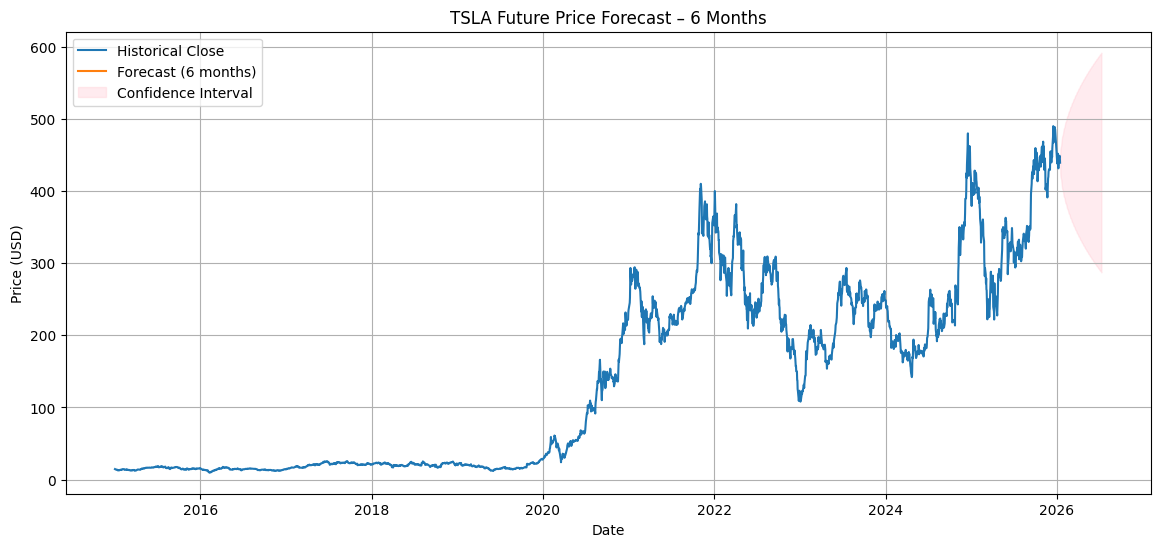

Average forecasted daily return: nan
Risk: Expected downward trend, consider hedging or avoiding new positions
Confidence intervals widen over time, indicating increasing uncertainty for long-term predictions.


In [27]:

# Forecast 6 months (~126 trading days)
n_forecast = 126
forecast_values, conf_int = arima_model.predict(n_periods=n_forecast, return_conf_int=True)

# Create future date index (business days)
future_dates = pd.date_range(start=tsla_close.index[-1] + pd.Timedelta(days=1), periods=n_forecast, freq='B')

# Convert forecast to Series with datetime index
forecast_series = pd.Series(forecast_values, index=future_dates)
conf_lower = pd.Series(conf_int[:, 0], index=future_dates)
conf_upper = pd.Series(conf_int[:, 1], index=future_dates)

# Save forecast for Task 4
forecast_series.to_frame("Forecast").to_csv("../data/processed/tsla_forecast.csv", index_label="Date")

# Plot
plt.figure(figsize=(14,6))
plt.plot(tsla_close, label="Historical Close")
plt.plot(forecast_series, label="Forecast (6 months)")
plt.fill_between(future_dates, conf_lower, conf_upper, color='pink', alpha=0.3, label="Confidence Interval")
plt.title("TSLA Future Price Forecast – 6 Months")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

#Trend Analysis
# -------------------------
trend_change = forecast_series.pct_change().mean()
print(f"Average forecasted daily return: {trend_change:.4f}")

# Opportunities & Risks
if trend_change > 0:
    print("Opportunity: Expected upward trend, potential buy signal")
else:
    print("Risk: Expected downward trend, consider hedging or avoiding new positions")
print("Confidence intervals widen over time, indicating increasing uncertainty for long-term predictions.")

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

tsla_close = tsla["Close"]
model = SARIMAX(tsla_close, order=(1,1,0))  # or best order from auto_arima
results = model.fit(disp=False)

n_future = 126
forecast_future = results.get_forecast(steps=n_future).predicted_mean

future_index = pd.date_range(tsla_close.index[-1] + pd.Timedelta(days=1),
                             periods=n_future, freq='B')

forecast_series = pd.Series(forecast_future.values, index=future_index)
forecast_series.to_frame("Forecast").to_csv("../data/processed/tsla_forecast.csv", index_label="Date")


c:\Users\mihre\Documents\KIAM\week 9\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mihre\Documents\KIAM\week 9\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mihre\Documents\KIAM\week 9\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\mihre\Documents\KIAM\week 9\portfolio-optimization\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: 